In [32]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sb
import matplotlib.pyplot as plt
import math

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df_train = pd.read_csv("train.tsv", delimiter='\t')
df_test = pd.read_csv("test.tsv", delimiter='\t')

In [4]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
df_train=df_train.drop(['train_id'],1)
df_test=df_test.drop(['test_id'],1)

In [6]:
df_train.shape

(1482535, 7)

Chaning the categorical variables to numerics.

In [64]:
trainData=df_train.copy()
le = preprocessing.LabelEncoder()
trainData['category_id']= le.fit_transform(df_train.category_name.astype(str))
trainData['brand_id']= le.fit_transform(df_train.brand_name.astype(str))

In [65]:
trainData.columns

Index(['name', 'item_condition_id', 'category_name', 'brand_name', 'price',
       'shipping', 'item_description', 'category_id', 'brand_id'],
      dtype='object')

In [68]:
trainData.isnull().sum()

name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
category_id               0
brand_id                  0
dtype: int64

In [40]:
df_train['brand_name'].value_counts()

PINK                      54088
Nike                      54043
Victoria's Secret         48036
LuLaRoe                   31024
Apple                     17322
FOREVER 21                15186
Nintendo                  15007
Lululemon                 14558
Michael Kors              13928
American Eagle            13254
Rae Dunn                  12305
Sephora                   12172
Coach                     10463
Disney                    10360
Bath & Body Works         10354
Adidas                    10202
Funko                      9237
Under Armour               8461
Sony                       7994
Old Navy                   7567
Hollister                  6948
Carter's                   6385
Urban Decay                6210
The North Face             6172
Independent                5902
Too Faced                  5794
Xbox                       5709
Brandy Melville            5680
Kate Spade                 5411
MAC                        5302
                          ...  
FORM Ath

In [17]:
trainData['shipping'].value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

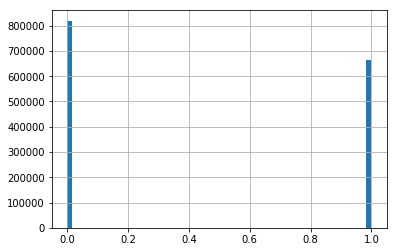

In [29]:
trainData['shipping'].hist(bins='auto')

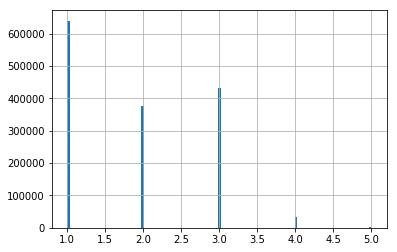

In [30]:
trainData['item_condition_id'].hist(bins='auto')

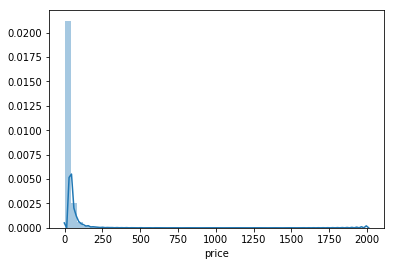

In [45]:
sb.distplot(trainData['price']);

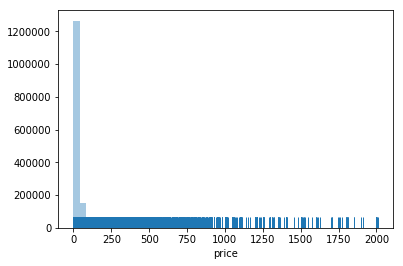

In [46]:
sb.distplot(trainNew['price'], kde=False, rug=True);

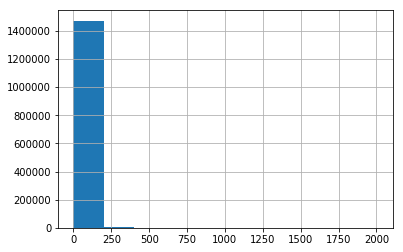

In [50]:
trainData['price'].hist()

The price column is very skewed to the left. log can reduce that skewness and (+1) is to avoid log(0)

In [44]:
trainData['logPrice']=np.log(trainData['price']+1)

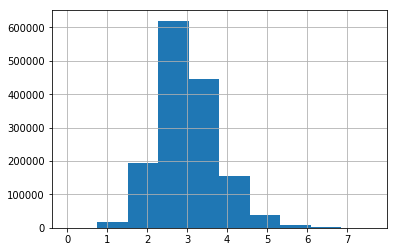

In [49]:
trainData['logPrice'].hist()

In [ ]:
#df_train.plot(x='brand_name', y='price', kind="bar")

In [15]:
#get some queries
df_train.query('price > 100 & brand_name == "Nike"')

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1302,jordan 12 vivid pink,1,Kids/Boys (4+)/Shoes,Nike,186.0,0,"brand new , never worn size 7 in kids , so the..."
2101,NIKE WOMENS AIR MAX SZ 8.5 NEW,1,Women/Shoes/Athletic,Nike,116.0,0,NIKE WOMENS AIR MAX SZ 8.5 NEW 100% authentic ...
3094,Kobe IX Elite,1,Men/Shoes/Athletic,Nike,186.0,0,New with box size:10
4272,2 Year 24 hour fitness gym membership,1,Sports & Outdoors/Exercise/Fitness accessories,Nike,250.0,1,2 year all club sport membership for 24 hour f...
6100,Jordan Gamma 11,2,Kids/Boys (4+)/Shoes,Nike,130.0,1,Excellent condition. Worn 1x. Size 5.5 boys or...
8414,Pink Snakeskin 11s,2,Kids/Boys (4+)/Shoes,Nike,116.0,0,Comes with og box AMAZING condition price firm
8875,Nike foamposite (Gucci),2,Men/Shoes/Athletic,Nike,236.0,0,Only worn twice
11077,Foamposits,2,Men/Shoes/Athletic,Nike,135.0,1,No description yet
11530,Jordan 12 Deep Royal Blue Size 6.5Y,1,Kids/Boys (4+)/Shoes,Nike,200.0,1,These are brand new Jordan 12 in Deep Royal Bl...
12070,Space Jams Jordan 11s,1,Kids/Boys (4+)/Shoes,Nike,161.0,0,Dead stock never worn 10/10 condition


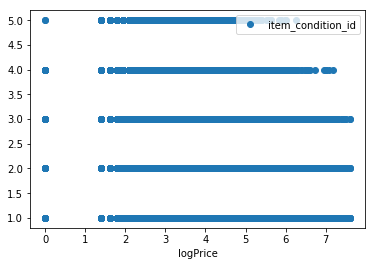

In [51]:
trainData.plot(x='logPrice', y='item_condition_id', style='o')

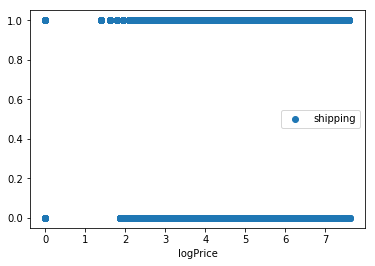

In [55]:
trainData.plot(x='logPrice', y='shipping',style='o' )

In [ ]:
#no strong correlation between price and other variables

In [43]:
trainData.corr()

,item_condition_id,category_name,brand_name,price,shipping
item_condition_id,1.000000,0.176928,-0.141512,-0.000807,-0.191154
category_name,0.176928,1.000000,-0.123406,0.048377,-0.143457
brand_name,-0.141512,-0.123406,1.000000,-0.113608,0.101608
price,-0.000807,0.048377,-0.113608,1.000000,-0.097211
shipping,-0.191154,-0.143457,0.101608,-0.097211,1.000000
